In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mi_vector=np.array([1,25,43,9])
mi_vector

array([ 1, 25, 43,  9])

In [ ]:
rango_valores = np.arange(0,10,1)
rango_valores

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.random.rand(5)

array([0.9653909 , 0.24158183, 0.53733804, 0.94681406, 0.84233356])

In [ ]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
np.arange(0,10,1)**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [ ]:
valores = np.arange(0,10,1)
valores_cuadrados = valores**2
print(valores)
print(valores_cuadrados)

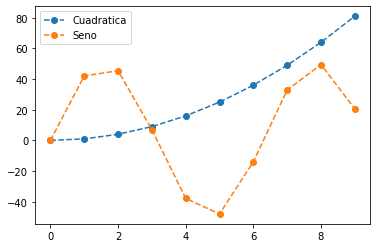

In [ ]:
fig,ax=plt.subplots()
ax.plot(valores,valores_cuadrados,ls='--',marker='o',label='Cuadratica')
ax.plot(valores,50*np.sin(valores),ls='--',marker='o',label='Seno')
ax.legend()
plt.show()

In [ ]:
mi_tabla=pd.DataFrame({'columna1':[1,2,3,4,5],'columna2': np.arange(6,11) })
mi_tabla

,columna1,columna2
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [ ]:
mi_tabla['cuadrados']=mi_tabla['columna1']**2
mi_tabla

,columna1,columna2,cuadrados
0,1,6,1
1,2,7,4
2,3,8,9
3,4,9,16
4,5,10,25


In [ ]:
datos=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clase1/altura_peso.csv')
datos

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
males=datos[(datos['Gender']=='Male') | (datos['Weight'] > 180)]
females=datos[datos['Gender']=='Female']
males

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9180,Female,68.879107,181.316223
9310,Female,67.968897,188.872275
9433,Female,69.300428,185.187970
9633,Female,70.350015,202.237214


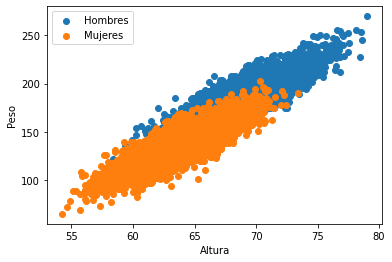

In [ ]:
males=datos[datos['Gender']=='Male']
fig,ax=plt.subplots()
plt.scatter(males['Height'],males['Weight'],label='Hombres')
plt.scatter(females['Height'], females['Weight'],label='Mujeres')
ax.set_xlabel('Altura')
ax.set_ylabel('Peso')
plt.legend()
plt.show()

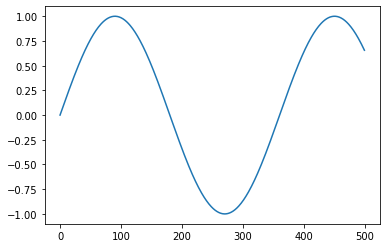

In [ ]:
plt.plot(np.sin(np.arange(0,500,1)*2*np.pi/360))


In [ ]:
pd.date_range('2020-01-01',periods=10,freq='d')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
datos.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [ ]:
regresion = pd.DataFrame()
regresion['x1']=np.sin(np.linspace(1,50,100))*100
regresion['x2']=np.linspace(1,50,100)**2
regresion['y']=regresion['x1']+regresion['x2']

regresion


,x1,x2,y
0,84.147098,1.000000,85.147098
1,99.712501,2.234874,101.947375
2,91.345447,3.959698,95.305145
3,61.054153,6.174472,67.228625
4,16.108970,8.879196,24.988166
...,...,...,...
95,-78.102923,2305.939802,2227.836880
96,-98.392690,2353.719927,2255.327236
97,-95.066776,2401.990001,2306.923225
98,-68.923448,2450.750026,2381.826578


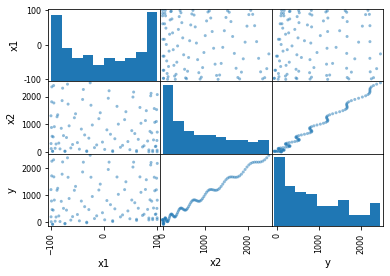

In [ ]:
f = pd.plotting.scatter_matrix(regresion)

In [ ]:
import statsmodels.api as sm
pronostico=regresion['y']
variables_base=regresion[['x1','x2']]
variables_base=sm.add_constant(variables_base)
o=sm.OLS(pronostico,variables_base).fit()
print(o.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.610e+31
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:31:30   Log-Likelihood:                 2684.4
No. Observations:                 100   AIC:                            -5363.
Df Residuals:                      97   BIC:                            -5355.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.812e-13   8.19e-14     -2.212      0.0

In [ ]:
from sklearn.model_selection import train_test_split as split 
x_train,x_test,y_train,y_test=split(regresion[['x1','x2']],regresion['y'],test_size=0.2)


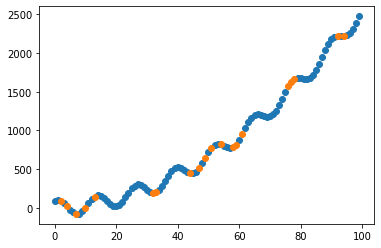

In [ ]:
fis,ax=plt.subplots()
ax.plot(y_train,label='entrenemiento',ls='',marker='o')
ax.plot(y_test,label='prueba',ls='',marker='o')

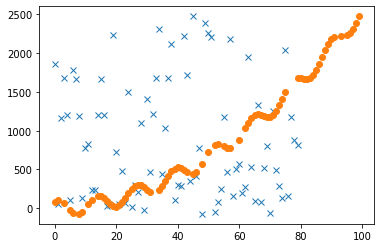

In [ ]:
from sklearn.linear_model import LinearRegression as MCO
algoritmo = MCO()
algoritmo.fit(x_train,y_train)
algoritmo.score(x_test,y_test)
plt.plot(algoritmo.predict(x_train),marker='x',ls='') 
plt.plot(y_train,marker='o',ls='')
